In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Absorption_model(num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B, dx):
    steps = int(path_length / dx)

    # Absorption probability per step for each species
    prob_A = 1 - np.exp(-epsilon_A * conc_A * dx)
    prob_B = 1 - np.exp(-epsilon_B * conc_B * dx)

    photons_alive = np.ones(num_photons, dtype=bool)
    distances = np.zeros(num_photons)

    # Counters for absorption at each step
    absorption_profile_A = np.zeros(steps)
    absorption_profile_B = np.zeros(steps)

    for step in range(steps):
        rand_nums = np.random.rand(num_photons)
        prob_total = prob_A + prob_B
        absorbed = (rand_nums < prob_total) & photons_alive

        # Distance recorded where photon is absorbed
        distances[absorbed] = step * dx

        # Determine absorbing species
        rand_species = np.random.rand(np.sum(absorbed))
        frac_A = prob_A / prob_total if prob_total > 0 else 0
        absorbed_A_mask = rand_species < frac_A
        absorbed_B_mask = ~absorbed_A_mask

        absorption_profile_A[step] += np.sum(absorbed_A_mask)
        absorption_profile_B[step] += np.sum(absorbed_B_mask)

        photons_alive[absorbed] = False

    distances[photons_alive] = path_length

    transmitted = np.sum(photons_alive)
    transmission = transmitted / num_photons
    absorbance = -np.log10(transmission)

    return absorbance, distances, absorption_profile_A, absorption_profile_B

C:\Users\Miles\AppData\Local\Temp\ipykernel_1184\1161723854.py:41: RuntimeWarning: divide by zero encountered in log10
  absorbance = -np.log10(transmission)


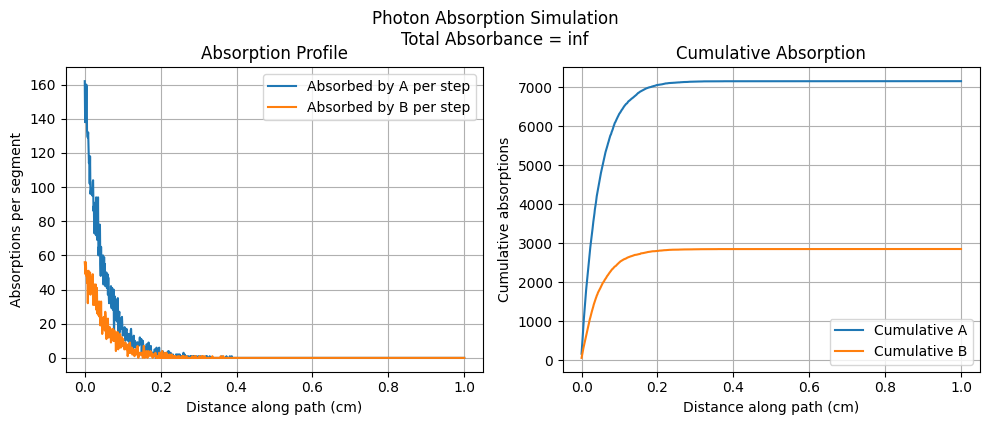

Total number of photons absorbed by A is for is:  7152.0
Total number of photons absorbed by B is for is:  2848.0
Total number of photons accounted for is:  10000


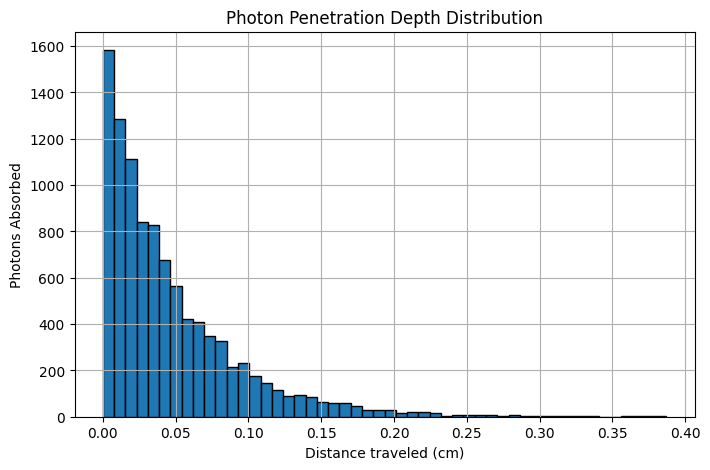

In [ ]:
# Example usage
if __name__ == "__main__":
    num_photons = 10000            # Number of photons to simulate               # Molar extinction coefficient (L·mol⁻¹·cm⁻¹)
    concentration = 0.005         # Concentration of solute (mol·L⁻¹)
    path_length = 1    
    epsilon_A = 3000.0  # L/(mol*cm)
    conc_A = 0.005  # mol/L
    epsilon_B = 3000                            ##Situation where A has higher concentration than B
    conc_B = 0.003
    dx = 0.001
    
    absorbance, distances, profile_A, profile_B = Absorption_model(
    num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B, dx
    )

    cumulative_A = np.cumsum(profile_A)
    cumulative_B = np.cumsum(profile_B)
    x = np.linspace(0, path_length, len(profile_A))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, profile_A, label='Absorbed by A per step')
    plt.plot(x, profile_B, label='Absorbed by B per step')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Absorptions per segment")
    plt.title("Absorption Profile")
    plt.legend()
    plt.grid(True)

    # Plot: Cumulative absorption
    plt.subplot(1, 2, 2)
    plt.plot(x, cumulative_A, label='Cumulative A')
    plt.plot(x, cumulative_B, label='Cumulative B')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Cumulative absorptions")
    plt.title("Cumulative Absorption")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(f"Photon Absorption Simulation", y=1.05)
    plt.show()


    print("Total number of photons absorbed by A is for is: ", cumulative_A.max() )
    print("Total number of photons absorbed by B is for is: ", cumulative_B.max() )

    """This takes the absorbance model for 10000 photons 
    and runs how far the photon population is able to propagate """
    

    print("Total number of photons accounted for is: ", len(distances) )
    plt.figure(figsize=(8, 5))
    plt.hist(distances, bins=50, edgecolor='black', density=False)
    plt.title("Photon Penetration Depth Distribution")
    plt.xlabel("Distance traveled (cm)")
    plt.ylabel("Photons Absorbed")
    plt.grid(True)
    plt.show()


C:\Users\Miles\AppData\Local\Temp\ipykernel_1184\1161723854.py:41: RuntimeWarning: divide by zero encountered in log10
  absorbance = -np.log10(transmission)


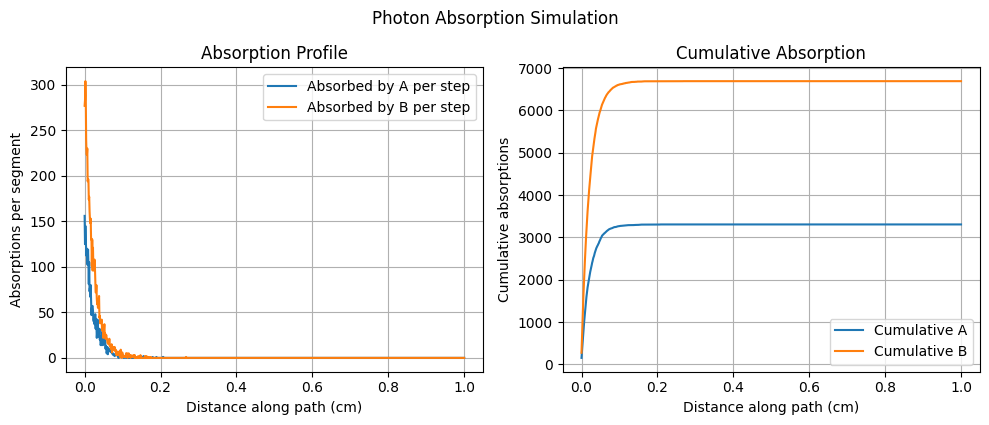

Total number of photons absorbed by A is for is:  3308.0
Total number of photons absorbed by B is for is:  6692.0
Total number of photons accounted for is:  10000


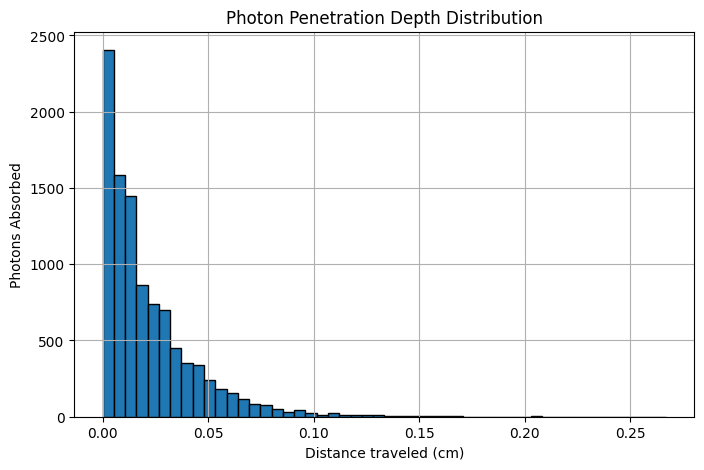

In [5]:
if __name__ == "__main__":
    num_photons = 10000            # Number of photons to simulate               # Molar extinction coefficient (L·mol⁻¹·cm⁻¹)
    concentration = 0.005         # Concentration of solute (mol·L⁻¹)
    path_length = 1    
    epsilon_A = 3000.0  # L/(mol*cm)
    conc_A = 0.005  # mol/L                     ##Situation where B has higher concentration than A
    epsilon_B = 3000
    conc_B = 0.010
    dx = 0.001
    
    absorbance, distances, profile_A, profile_B = Absorption_model(
    num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B, dx
    )

    cumulative_A = np.cumsum(profile_A)
    cumulative_B = np.cumsum(profile_B)
    x = np.linspace(0, path_length, len(profile_A))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, profile_A, label='Absorbed by A per step')
    plt.plot(x, profile_B, label='Absorbed by B per step')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Absorptions per segment")
    plt.title("Absorption Profile")
    plt.legend()
    plt.grid(True)

    # Plot: Cumulative absorption
    plt.subplot(1, 2, 2)
    plt.plot(x, cumulative_A, label='Cumulative A')
    plt.plot(x, cumulative_B, label='Cumulative B')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Cumulative absorptions")
    plt.title("Cumulative Absorption")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(f"Photon Absorption Simulation", y=1.05)
    plt.show()


    print("Total number of photons absorbed by A is for is: ", cumulative_A.max() )
    print("Total number of photons absorbed by B is for is: ", cumulative_B.max() )

    """This takes the absorbance model for 10000 photons 
    and runs how far the photon population is able to propagate """
    

    print("Total number of photons accounted for is: ", len(distances) )
    plt.figure(figsize=(8, 5))
    plt.hist(distances, bins=50, edgecolor='black', density=False)
    plt.title("Photon Penetration Depth Distribution")
    plt.xlabel("Distance traveled (cm)")
    plt.ylabel("Photons Absorbed")
    plt.grid(True)
    plt.show()



C:\Users\Miles\AppData\Local\Temp\ipykernel_1184\1161723854.py:41: RuntimeWarning: divide by zero encountered in log10
  absorbance = -np.log10(transmission)


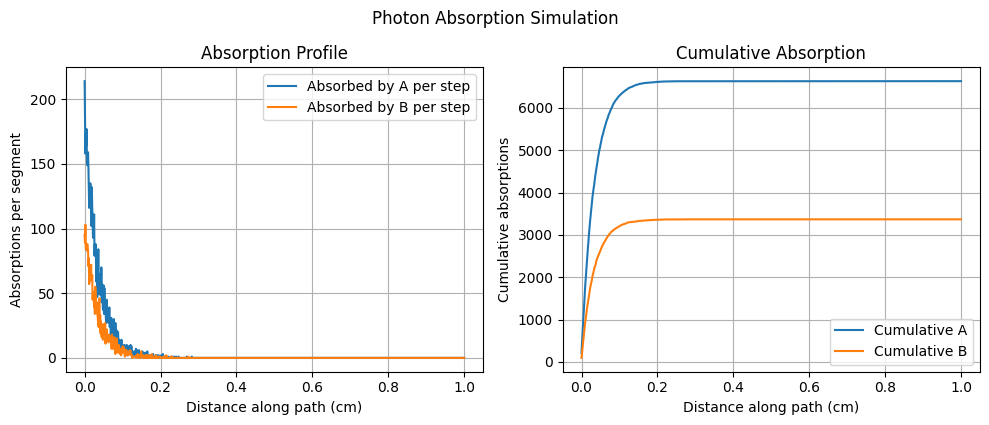

Total number of photons absorbed by A is for is:  6632.0
Total number of photons absorbed by B is for is:  3368.0
Total number of photons accounted for is:  10000


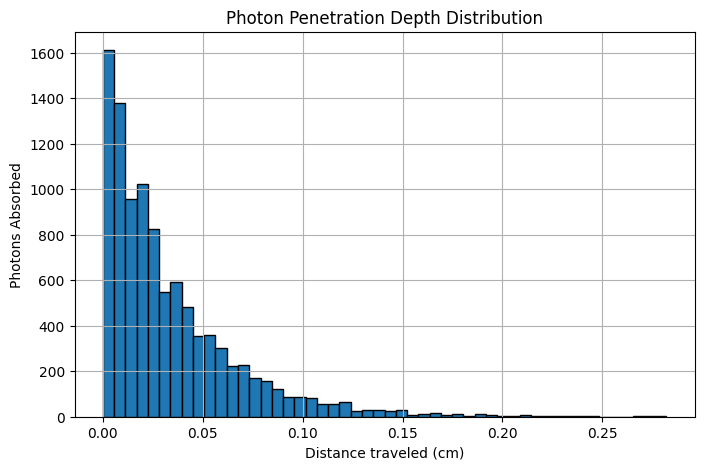

In [6]:
if __name__ == "__main__":
    num_photons = 10000            # Number of photons to simulate               # Molar extinction coefficient (L·mol⁻¹·cm⁻¹)
    concentration = 0.005         # Concentration of solute (mol·L⁻¹)
    path_length = 1    
    epsilon_A = 4000.0  # L/(mol*cm)
    conc_A = 0.005  # mol/L                     ##Situation where A has much higher extinction coefficient than B
    epsilon_B = 2000
    conc_B = 0.005
    dx = 0.001
    
    absorbance, distances, profile_A, profile_B = Absorption_model(
    num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B, dx
    )

    cumulative_A = np.cumsum(profile_A)
    cumulative_B = np.cumsum(profile_B)
    x = np.linspace(0, path_length, len(profile_A))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, profile_A, label='Absorbed by A per step')
    plt.plot(x, profile_B, label='Absorbed by B per step')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Absorptions per segment")
    plt.title("Absorption Profile")
    plt.legend()
    plt.grid(True)

    # Plot: Cumulative absorption
    plt.subplot(1, 2, 2)
    plt.plot(x, cumulative_A, label='Cumulative A')
    plt.plot(x, cumulative_B, label='Cumulative B')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Cumulative absorptions")
    plt.title("Cumulative Absorption")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(f"Photon Absorption Simulation", y=1.05)
    plt.show()


    print("Total number of photons absorbed by A is for is: ", cumulative_A.max() )
    print("Total number of photons absorbed by B is for is: ", cumulative_B.max() )

    """This takes the absorbance model for 10000 photons 
    and runs how far the photon population is able to propagate """
    

    print("Total number of photons accounted for is: ", len(distances) )
    plt.figure(figsize=(8, 5))
    plt.hist(distances, bins=50, edgecolor='black', density=False)
    plt.title("Photon Penetration Depth Distribution")
    plt.xlabel("Distance traveled (cm)")
    plt.ylabel("Photons Absorbed")
    plt.grid(True)
    plt.show()



C:\Users\Miles\AppData\Local\Temp\ipykernel_1184\1161723854.py:41: RuntimeWarning: divide by zero encountered in log10
  absorbance = -np.log10(transmission)


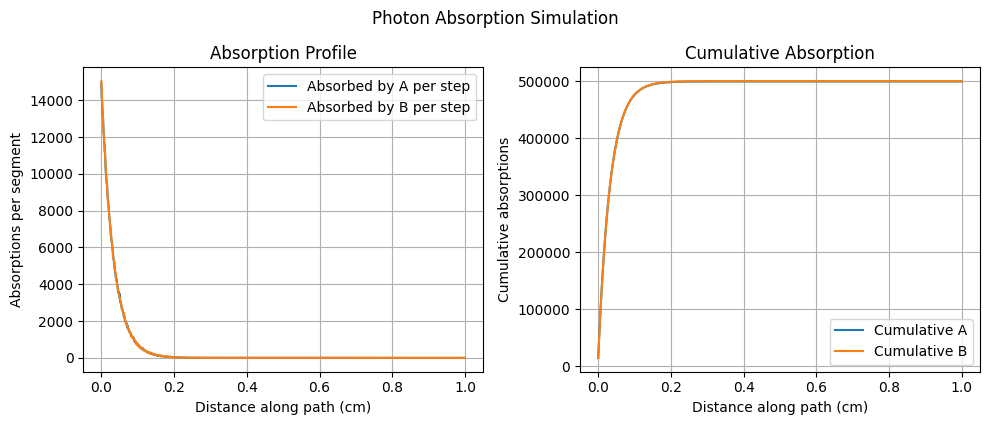

Total number of photons absorbed by A is for is:  499785.0
Total number of photons absorbed by B is for is:  500215.0
Total number of photons accounted for is:  1000000


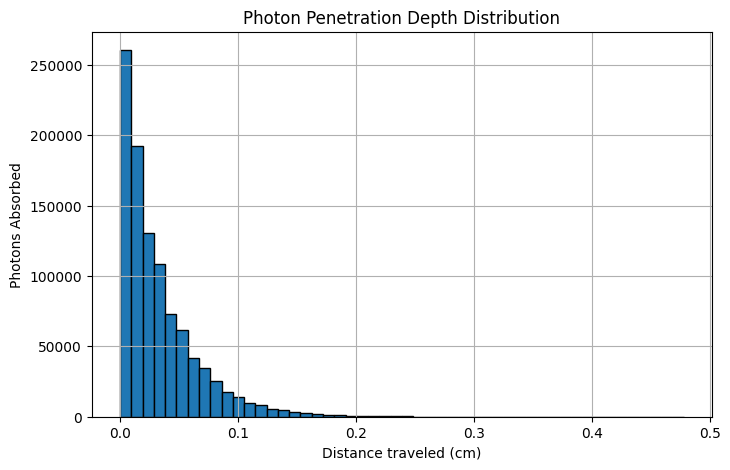

In [ ]:
if __name__ == "__main__":
    num_photons = 1000000            # Number of photons to simulate               # Molar extinction coefficient (L·mol⁻¹·cm⁻¹)
    concentration = 0.005         # Concentration of solute (mol·L⁻¹)
    path_length = 1    
    epsilon_A = 3000.0  # L/(mol*cm)
    conc_A = 0.005  # mol/L                     ##With a much higher photon population, predictably this just led to total saturation and comparable absorption counts
    epsilon_B = 3000
    conc_B = 0.005
    dx = 0.001
    
    absorbance, distances, profile_A, profile_B = Absorption_model(
    num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B, dx
    )

    cumulative_A = np.cumsum(profile_A)
    cumulative_B = np.cumsum(profile_B)
    x = np.linspace(0, path_length, len(profile_A))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, profile_A, label='Absorbed by A per step')
    plt.plot(x, profile_B, label='Absorbed by B per step')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Absorptions per segment")
    plt.title("Absorption Profile")
    plt.legend()
    plt.grid(True)

    # Plot: Cumulative absorption
    plt.subplot(1, 2, 2)
    plt.plot(x, cumulative_A, label='Cumulative A')
    plt.plot(x, cumulative_B, label='Cumulative B')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Cumulative absorptions")
    plt.title("Cumulative Absorption")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(f"Photon Absorption Simulation", y=1.05)
    plt.show()


    print("Total number of photons absorbed by A is for is: ", cumulative_A.max() )
    print("Total number of photons absorbed by B is for is: ", cumulative_B.max() )

    """This takes the absorbance model for 10000 photons 
    and runs how far the photon population is able to propagate """
    

    print("Total number of photons accounted for is: ", len(distances) )
    plt.figure(figsize=(8, 5))
    plt.hist(distances, bins=50, edgecolor='black', density=False)
    plt.title("Photon Penetration Depth Distribution")
    plt.xlabel("Distance traveled (cm)")
    plt.ylabel("Photons Absorbed")
    plt.grid(True)
    plt.show()



C:\Users\Miles\AppData\Local\Temp\ipykernel_1184\1161723854.py:41: RuntimeWarning: divide by zero encountered in log10
  absorbance = -np.log10(transmission)


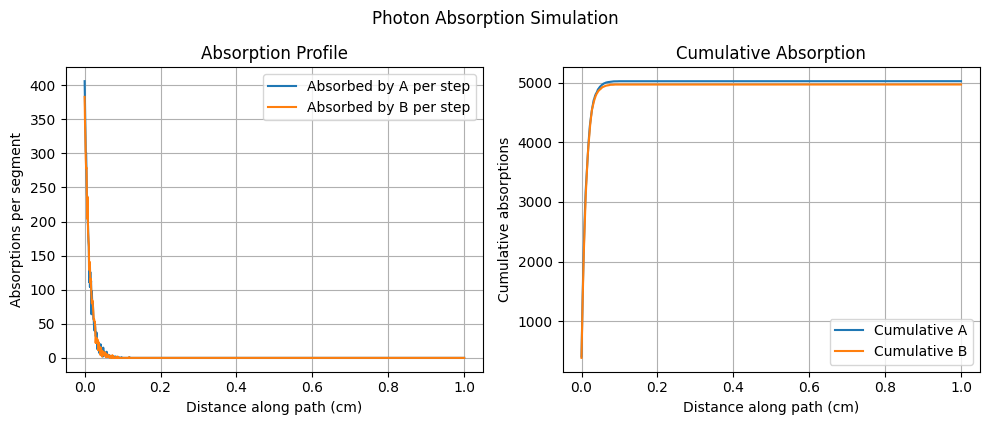

Total number of photons absorbed by A is for is:  5028.0
Total number of photons absorbed by B is for is:  4972.0
Total number of photons accounted for is:  10000


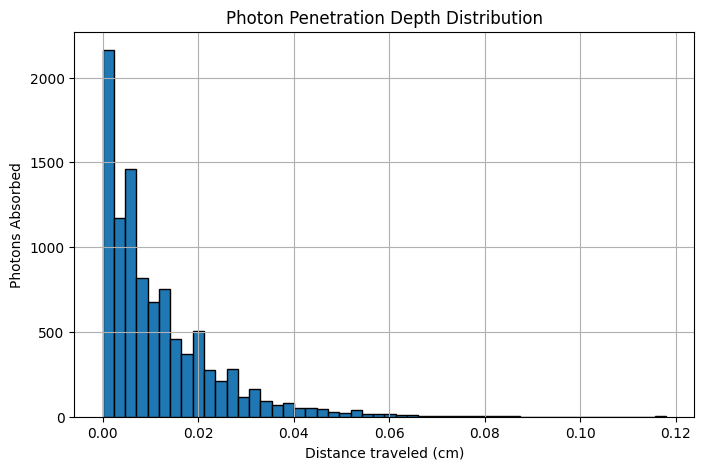

In [8]:
if __name__ == "__main__":
    num_photons = 10000            # Number of photons to simulate               # Molar extinction coefficient (L·mol⁻¹·cm⁻¹)
    concentration = 0.005         # Concentration of solute (mol·L⁻¹)
    path_length = 1    
    epsilon_A = 4000.0  # L/(mol*cm)
    conc_A = 0.01  # mol/L                     ##ab
    epsilon_B = 4000
    conc_B = 0.01
    dx = 0.001
    
    absorbance, distances, profile_A, profile_B = Absorption_model(
    num_photons, path_length, epsilon_A, conc_A, epsilon_B, conc_B, dx
    )

    cumulative_A = np.cumsum(profile_A)
    cumulative_B = np.cumsum(profile_B)
    x = np.linspace(0, path_length, len(profile_A))

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(x, profile_A, label='Absorbed by A per step')
    plt.plot(x, profile_B, label='Absorbed by B per step')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Absorptions per segment")
    plt.title("Absorption Profile")
    plt.legend()
    plt.grid(True)

    # Plot: Cumulative absorption
    plt.subplot(1, 2, 2)
    plt.plot(x, cumulative_A, label='Cumulative A')
    plt.plot(x, cumulative_B, label='Cumulative B')
    plt.xlabel("Distance along path (cm)")
    plt.ylabel("Cumulative absorptions")
    plt.title("Cumulative Absorption")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(f"Photon Absorption Simulation", y=1.05)
    plt.show()


    print("Total number of photons absorbed by A is for is: ", cumulative_A.max() )
    print("Total number of photons absorbed by B is for is: ", cumulative_B.max() )

    """This takes the absorbance model for 10000 photons 
    and runs how far the photon population is able to propagate """
    

    print("Total number of photons accounted for is: ", len(distances) )
    plt.figure(figsize=(8, 5))
    plt.hist(distances, bins=50, edgecolor='black', density=False)
    plt.title("Photon Penetration Depth Distribution")
    plt.xlabel("Distance traveled (cm)")
    plt.ylabel("Photons Absorbed")
    plt.grid(True)
    plt.show()

